# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply Seaborn style directly
sns.set_style('whitegrid')
sns.set_palette('viridis')
%matplotlib inline


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv')
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# TODO: Aggregate data by year to create a 124-year time series
aggregate_data = df.groupby('Year').agg(['mean'])
# Now rename columns to keep the original names
aggregate_data.columns = [col[0] for col in aggregate_data.columns]  # Flatten column names
variables = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)','Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']
print(aggregate_data[variables].describe())


       Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count                       124.000000               124.000000   
mean                         14.499538               350.028626   
std                           0.009960                 0.456535   
min                          14.474559               348.642249   
25%                          14.492782               349.691692   
50%                          14.499496               350.022334   
75%                          14.504872               350.367023   
max                          14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748                       8.893453  
25%             149.207437                       8.978851  
50%             149.918062          

## 2. Univariate Analysis

Analyze each climate variable independently.

In [ ]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

3.1 Correlation Matrix For Bivariate

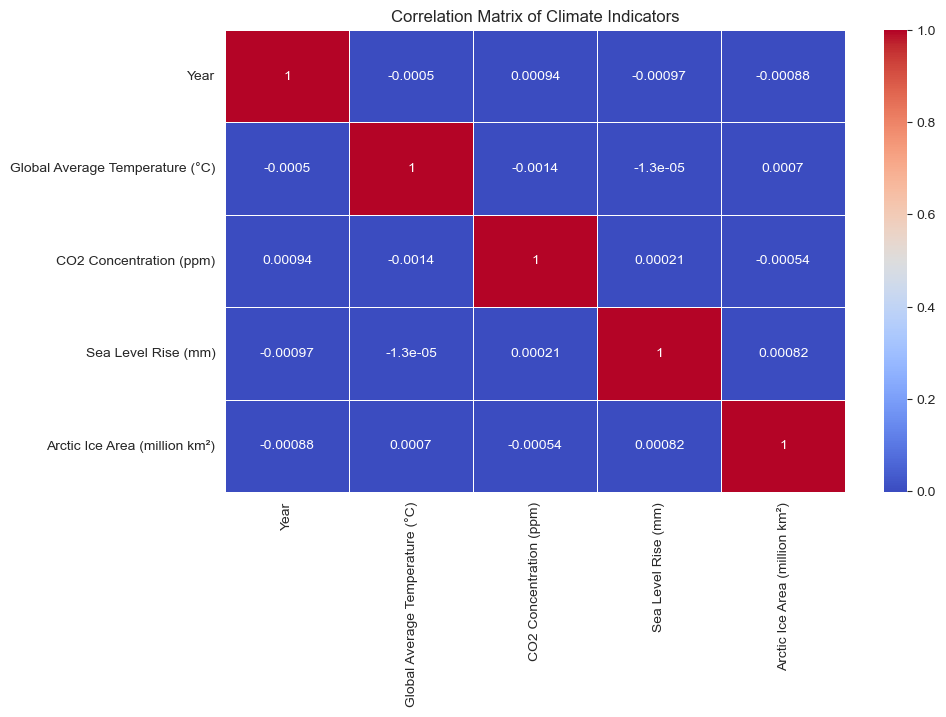

In [ ]:
# Computed correlation matrix
correlation_matrix = df.corr()

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Climate Indicators')
plt.show()


3.2 Scatter Plots Done

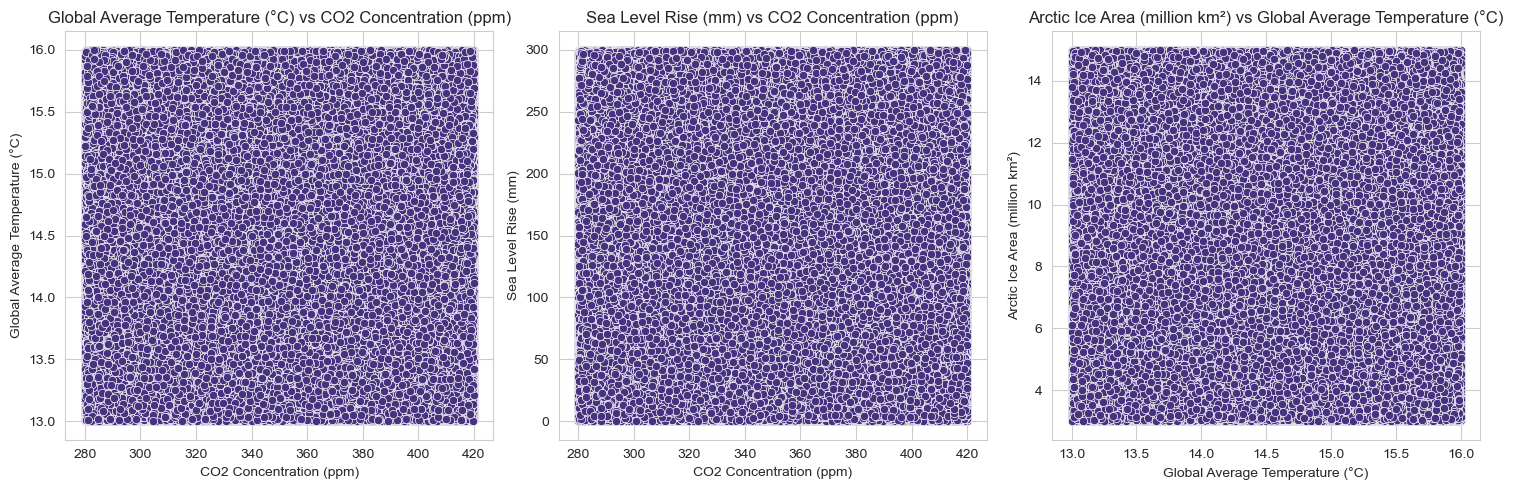

In [ ]:
scatter_pairs = [
    ('CO2 Concentration (ppm)', 'Global Average Temperature (°C)'),
    ('CO2 Concentration (ppm)', 'Sea Level Rise (mm)'),
    ('Global Average Temperature (°C)', 'Arctic Ice Area (million km²)')
]

# Plotting scatter plots
plt.figure(figsize=(15, 5))

for i, (x_var, y_var) in enumerate(scatter_pairs):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df, x=x_var, y=y_var)
    plt.title(f'{y_var} vs {x_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()


3.3 Temporal Analysis

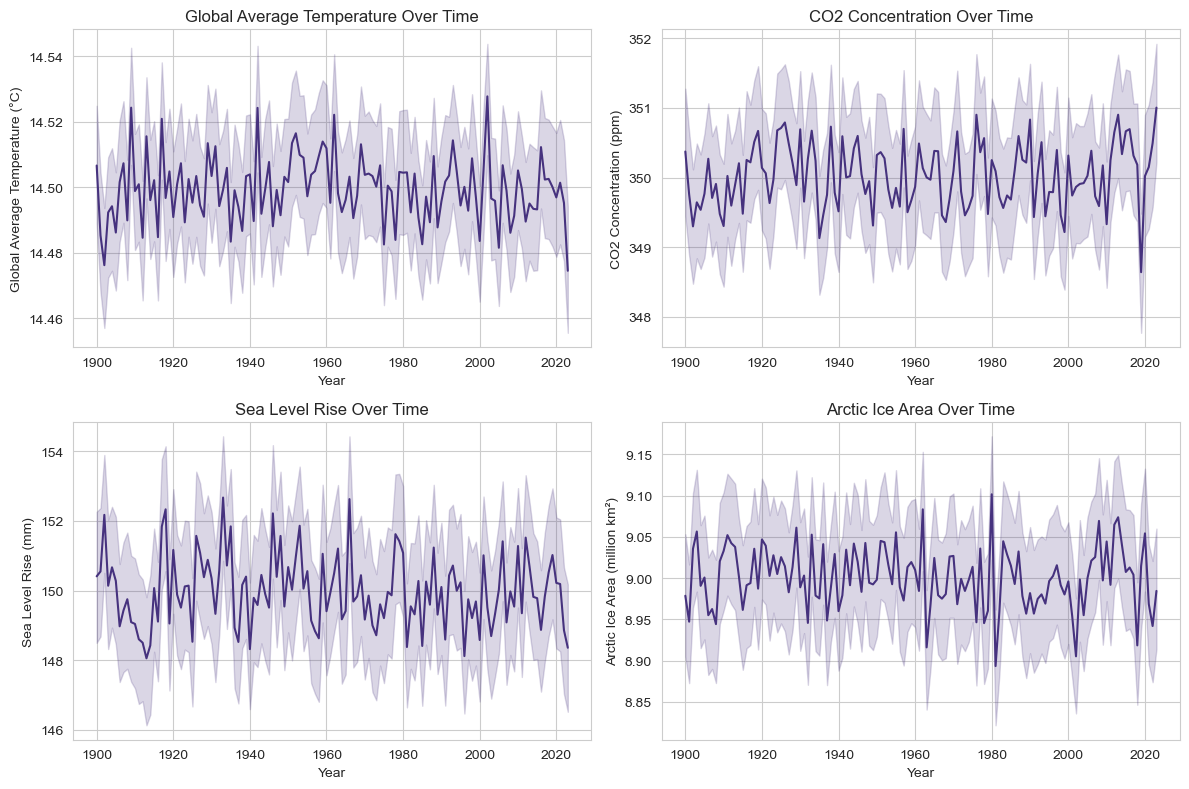

In [ ]:
# Plotting variables over time
plt.figure(figsize=(12, 8))

# Global Temperature over time
plt.subplot(2, 2, 1)
sns.lineplot(data=df, x='Year', y='Global Average Temperature (°C)')
plt.title('Global Average Temperature Over Time')

# CO2 Concentration over time
plt.subplot(2, 2, 2)
sns.lineplot(data=df, x='Year', y='CO2 Concentration (ppm)')
plt.title('CO2 Concentration Over Time')

# Sea Level Rise over time
plt.subplot(2, 2, 3)
sns.lineplot(data=df, x='Year', y='Sea Level Rise (mm)')
plt.title('Sea Level Rise Over Time')

# Arctic Ice Area over time
plt.subplot(2, 2, 4)
sns.lineplot(data=df, x='Year', y='Arctic Ice Area (million km²)')
plt.title('Arctic Ice Area Over Time')

plt.tight_layout()
plt.show()


3.4 Pair Plot

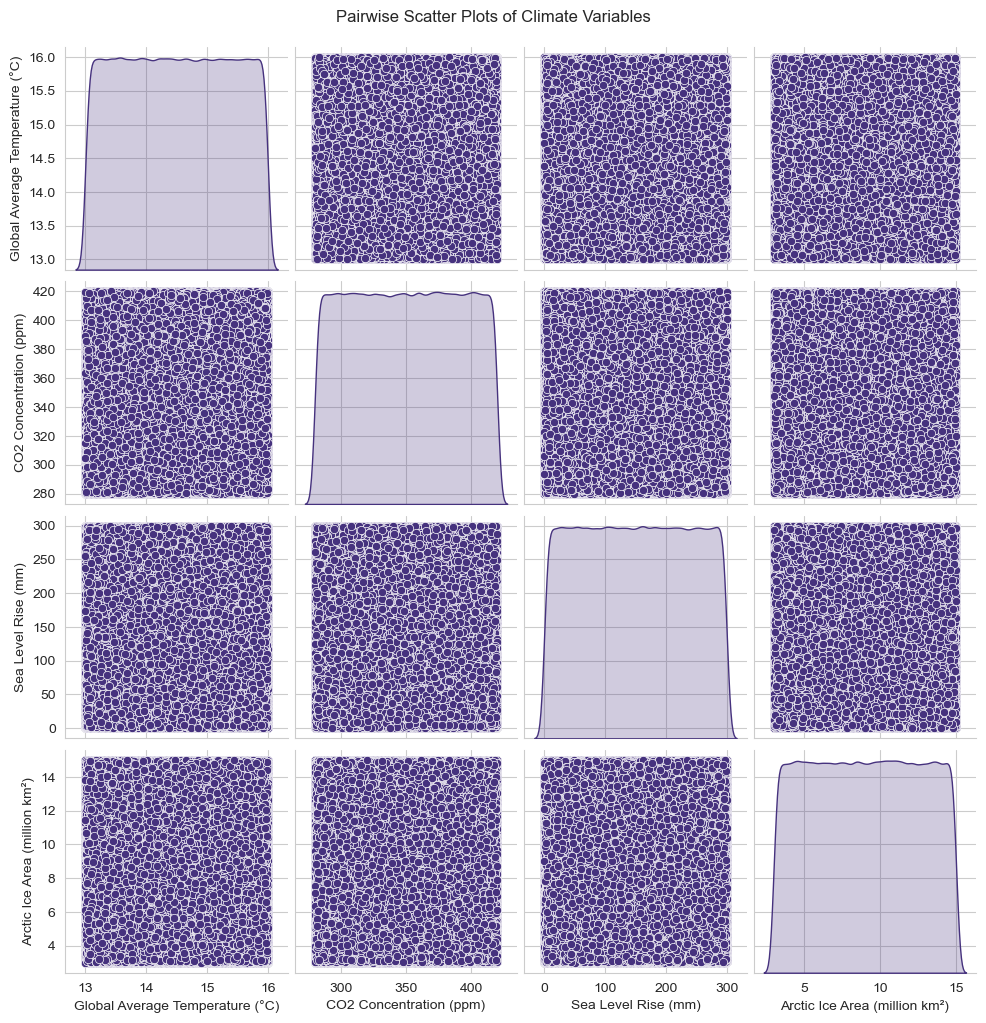

In [ ]:
selected_vars = [
    'Global Average Temperature (°C)',
    'CO2 Concentration (ppm)',
    'Sea Level Rise (mm)',
    'Arctic Ice Area (million km²)'
]

sns.pairplot(df[selected_vars], diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots of Climate Variables', y=1.02)
plt.show()


## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [7]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here